In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

## Tarea 2 
### Ignacio Palos Reynoso

## Propiedades de sistemas LTI:


### Linealidad
Un sistema es lineal cuando cumple la siguiente ecuación:

\begin{align}
T[a_1x_1(t) + a_2x_2(t)] \; = \; T[a_1x_1(t)] + T[a_2x_2(t)] \; = \; a_1y_1(t) + a_2y_2(t)
\end{align}

Esto quiere decir que si tenemos dos ( o más) señales $x_1(t), x_2(t), ...$ cuyas respuestas son $y_1(t), y_2(t),...$, la suma de las señales nos da una respuesta equivalente a la suma de las respuestas.

### Invariancia en el tiempo

Un sistema invariante en el tiempo es aquel que presenta la misma respuesta, sin importar cuando se está midiendo es decir, si la señal x(t) produce una respuesta y(t), entonces $x(t + \sigma)$ produce una respuesta $y(t+\sigma)$

### Causalidad

Un sistema es causal si su respuesta depende de entradas del pasado y presentes, pero no del futuro, es decir:

$h(t) = 0 \quad \forall t < 0$
donde h(t) es la respuesta impulso

### Estabilidad

Un sistema es estable si para toda entrada acotada, su señal también es acotada, es decir:

$ ||x(t)||_{\infty} < \infty \rightarrow ||y(t)||_\infty < \infty  $

## Propiedades de la transformada de Fourier:

Sean $f(x),g(x), h(x)$ funciones integrabeles, denotamos sus transformadas de Fourier respectivas con $\hat{f}(\xi),\hat{g}(\xi)\hat{h}(\xi)$

### Linealidad

Para $a,b \in \mathbb{C}$, si $h(x) = af(x)+bg(x)$, entonces $\hat{h}(\xi) = a\hat{f}(\xi) + b\hat{g}(\xi)$

### Desplazamiento en el tiempo

Para  cualquier $x_0 \in \mathbb{R}$, si $h(x) = f(x-x_0)$ entonces $\hat{h}(\xi) = \large{e^{-2\pi i x_0 \xi}\hat{f}(\xi)}$

### Desplazamiento de frecuencias

Para cualquier $\xi_0 \in \mathbb{R}$ si $h(x) = \large{e^{2\pi i x \xi_0}f(x)}$ entonces $\hat{h}(\xi) = \hat{f}(\xi-\xi_0) $

### Simetría 

Si $h(x) = \overline{f(x)}$, entonces $\hat{h}(\xi) = \overline{\hat{f}(-\xi)}$

### Escalamiento temporal

Sea $a \in \mathbb{R}, a \neq 0$, si $h(x) = f(ax)$ entonces $\large{\hat{h}(\xi) = \frac{1}{|a|}\hat{f}\left(\frac{\xi}{a}\right)}$

## Diagaramas de flujo

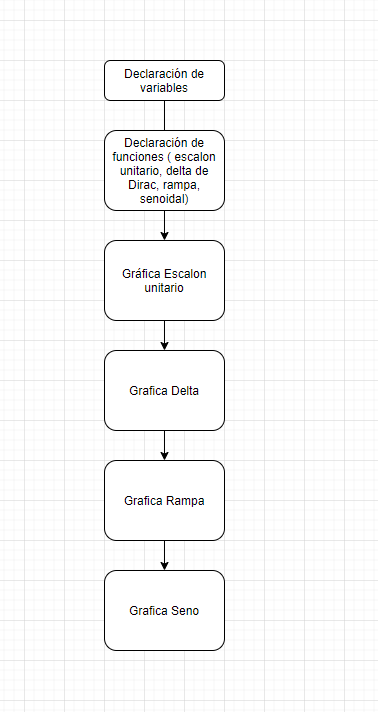

## Teorema de Shannon - Nyquist

Si una función $x(t)$ no contiene frecuencias mas altas que B hz, entonces dicha función se puede reconstruir perfectamente realizando un muestreo con una frecuencia al menos 2 veces mayor a B.

Para ejemplificar mejor este fenómeno, realizaremos algunas gráficas.

### Aqui tenemos una señal cuya frecuencia es de 60 Hz

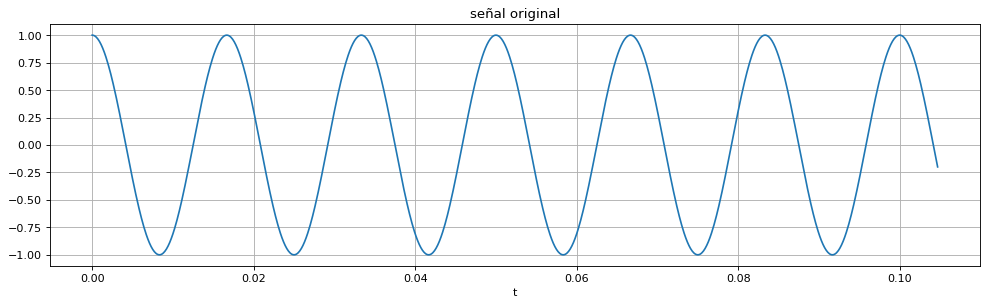

In [36]:
t = np.arange(0.0, 2*np.pi/60, .0001)
f1= np.cos(np.pi*2*t * 60)

fig, ax = plt.subplots(figsize=(15, 4), dpi=80)
ax.plot(t, f1)

ax.set(xlabel='t',title='señal original')
ax.grid()

plt.show()

### Si realizamos un muestreo de la función a una frecuencia  de 400 Hz, que es mayor a 120 Hz (el doble de la frecuencia de la señal), podemos reconstruir dicha señal

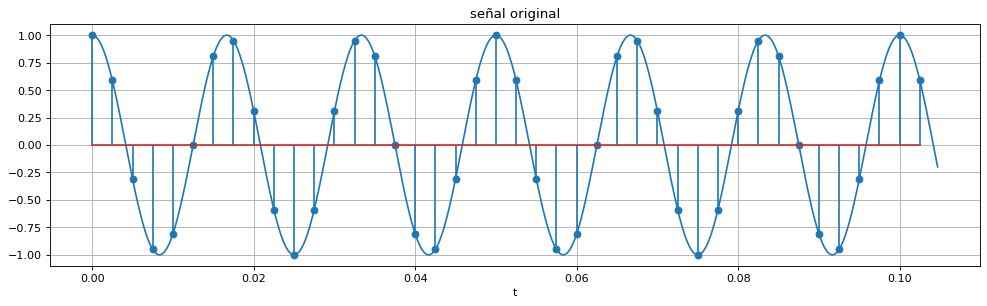

In [41]:
t1 = np.arange(0,2*np.pi/60, 1/400 )
p1=[np.cos(2*np.pi*i*60) for i in t1]

fig, ax = plt.subplots(figsize=(15, 4), dpi=80)
ax.plot(t,f1)
ax.stem(t1, p1)

ax.set(xlabel='t',title='señal original')
ax.grid()

plt.show()

### Pero si realizamos el muestreo con la frecuencia de 120 Hz hay veces en donde podemos obtener la señal, y veces en la que no la podemos obtener

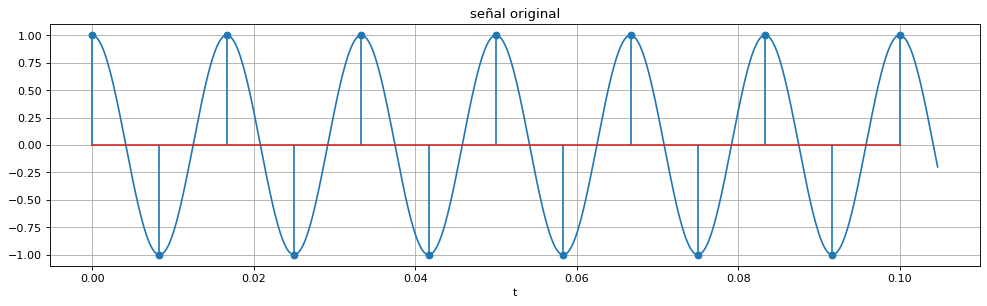

In [75]:
t2 = np.arange(0,2*np.pi/60, 1/120 )
p2=[np.cos(2*np.pi*i*60) for i in t2]

fig, ax = plt.subplots(figsize=(15, 4), dpi=80)
ax.plot(t,f1)
ax.stem(t2, p2)

ax.set(xlabel='t',title='señal original')
ax.grid()

plt.show()

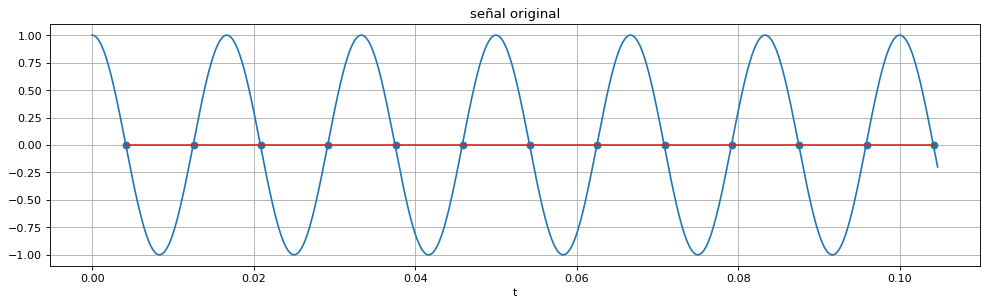

In [67]:
t3 = np.arange(0,2*np.pi/60, 1/120 )
p3=[np.cos(2*np.pi*i*60 + np.pi/2) for i in t3]

fig, ax = plt.subplots(figsize=(15, 4), dpi=80)
ax.plot(t,f1)
ax.stem(t3+np.pi/740,p3)

ax.set(xlabel='t',title='señal original')
ax.grid()

plt.show()

### En este caso, la frecuencia de muestreo sigue siendo de 120 Hz, pero tiene un pequeño desplazamiento de fase, y hace que cada vez que se realiza el muestreo, la función está evaluada en cero, por lo tanto el teorema de Shannon- Nyquist establece que es necesario hacer un muestreo con una frecuencia extrictamente mayor al doble de la frecuencia de la señal

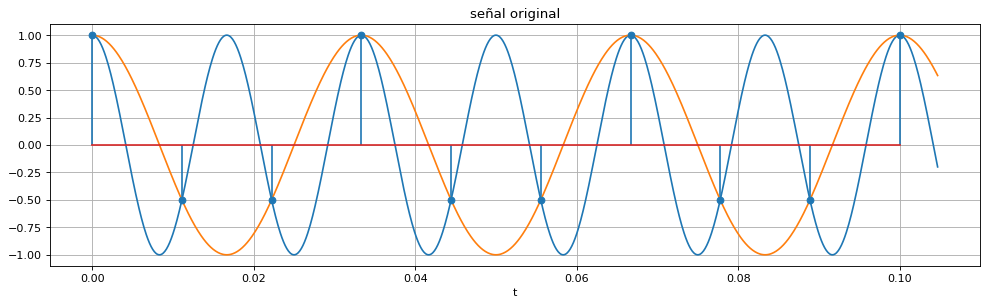

In [73]:
t4 = np.arange(0,2*np.pi/60, 1/90 )
p4=[np.cos(2*np.pi*i*60) for i in t4]
f2= np.cos(np.pi*2*t * 30)


fig, ax = plt.subplots(figsize=(15, 4), dpi=80)
ax.plot(t,f1)
ax.plot(t,f2)
ax.stem(t4,p4)

ax.set(xlabel='t',title='señal original')
ax.grid()

plt.show()

### En este caso, la frecuencia de muestreo es de 90 Hz, y al ser menor que 120 Hz, hace que coincida con 2 señales distintas, a 60 Hz (la original) , y a 30 Hz.  